In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [3]:
# Importing data

cola=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
# Cheking the info

cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
# Cheking if there are any null entries

cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
# Dorping duplicates if any.
cola.drop_duplicates(inplace=True)
cola.head(10)


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [7]:
# Checking index
cola.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

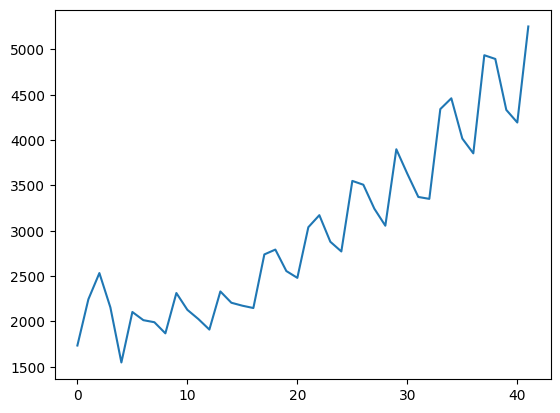

In [8]:
# Visualising the data

plt.plot(cola["Sales"])

<Axes: ylabel='Density'>

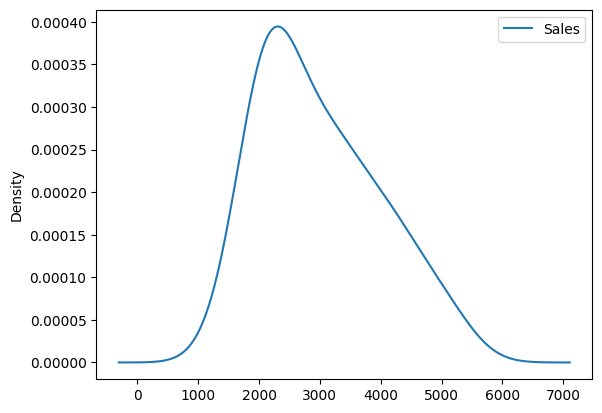

In [45]:
# plotting sales

cola.plot(kind="kde")

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

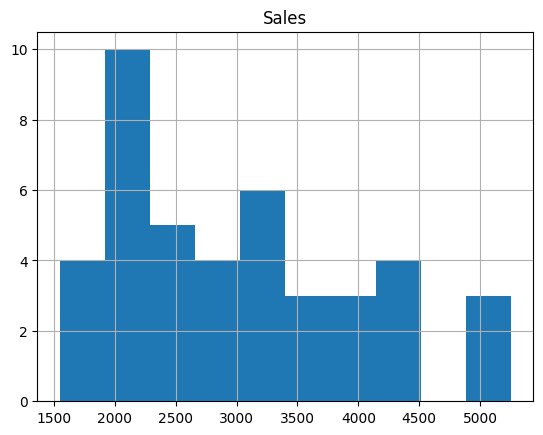

In [51]:
cola.hist()

**Extracting the Quarters i.e Q1,Q2,Q3 and Q4**





In [9]:
cola["quaters"]=0

for i in range(42):
  p=cola["Quarter"][i] # Created a inctence of p and passed the value i in range 0-41
  cola["quaters"][i]=p[0:2]

  # Note- Column-Quarter's value stands 0-Q, 1-1, 2-_ ,3- 84

  # so we only want (0 and 1 value) Q1, Q2... that's why we have passed p[0:2] to extract the value in column quaters

cola.head(10)


<ipython-input-9-62c68b6b3e49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola["quaters"][i]=p[0:2]


,Quarter,Sales,quaters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


<Axes: xlabel='quaters', ylabel='Sales'>

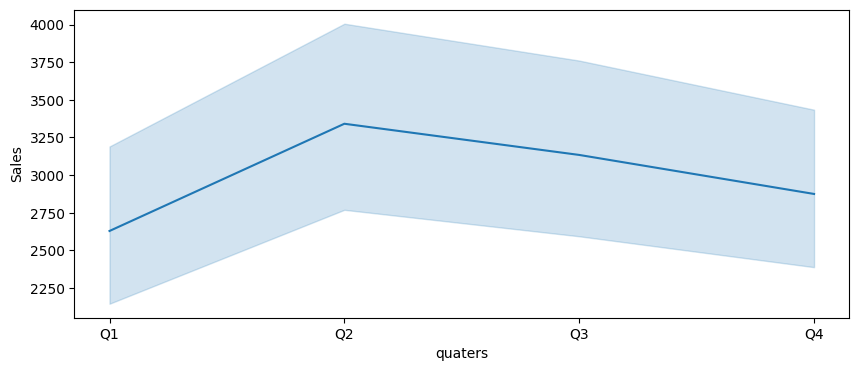

In [10]:
# Visualising the sales in quaters

plt.figure(figsize=(10,4))
sns.lineplot(x="quaters",y="Sales",data=cola)

In [11]:
# Pulling out each quater by dummies and concating  it.

dm=pd.get_dummies(cola["quaters"])

coke=pd.concat([cola,dm],axis=1)
coke.head()

,Quarter,Sales,quaters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [12]:
# Adding the columns, t ,tsquare and log sales

coke["t"]=np.arange(1,43)
coke["t_sqr"]=np.square(coke.t)
coke["log_sales"]=np.log(coke.Sales)
coke.head(10)

,Quarter,Sales,quaters,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


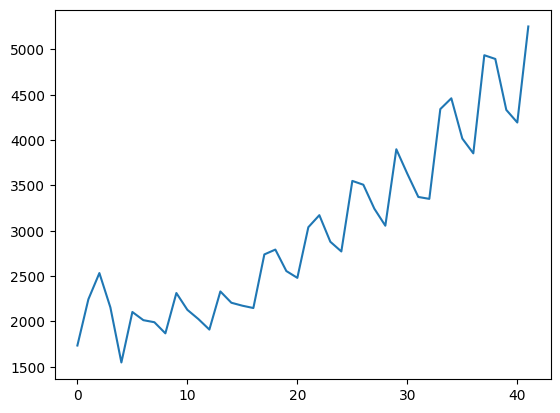

In [13]:
# Visualising the sales

plt.plot(coke["Sales"])

In [14]:
# splitting data in to Train and test

train=coke.head(34)
test=coke.tail(9)


In [15]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

**linear Model**

In [16]:
li_model=smf.ols("Sales~t",data=train).fit()
pred_li=pd.Series(li_model.predict(pd.DataFrame(test["t"])))
linear_rmse=np.sqrt(mean_squared_error(test["Sales"],pred_li))
linear_rmse

719.3863955087784

**Exponential model**

In [17]:
model_exp=smf.ols("log_sales~t",data=train).fit()
pred_exp=pd.Series(model_exp.predict(pd.DataFrame(test["t"])))
rmse_exp=np.sqrt(mean_squared_error(test["Sales"],pred_exp))
rmse_exp

4488.973341765614

**Quadratic Model**

In [18]:
# In Quadratic Model we will give the x varibales as t and tsqr
model_qua=smf.ols("Sales~t+t_sqr",data=train).fit()
pred_qua=pd.Series(model_qua.predict(pd.DataFrame(test[["t","t_sqr"]])))
rmse_qua=np.sqrt(mean_squared_error(test["Sales"],pred_qua))
rmse_qua

429.26786661736367

**Additive Seasonality Model**

In [19]:
# In Additive Seasonality Quadratic we will give the x varibales as quaters

model_add=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add=pd.Series(model_add.predict(pd.DataFrame(test[["Q1","Q2","Q3","Q4"]])))
rmse_add=np.sqrt(mean_squared_error(test["Sales"],pred_add))
rmse_add

1823.1297191874028

**Additive Seasonality Quadratic**

In [20]:
# In Additive Seasonality Quadratic we will combine the x varibales of both quadratic and additives

add_sea_qua=smf.ols("Sales~t+t_sqr+Q1+Q2+Q3+Q4",data=train).fit()
pred_sea_qua=pd.Series(add_sea_qua.predict(pd.DataFrame(test[["t","t_sqr","Q1","Q2","Q3","Q4"]])))
rmse_add_sea=np.sqrt(mean_squared_error(test["Sales"],pred_sea_qua))
rmse_add_sea


245.02918017986684

**Multiplicative Seasonality**

In [21]:
# In multilicative seasonality we will take y variable as log of y variabkes(log_sales) and x as all quaters

model_multi=smf.ols("log_sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_multi=pd.Series(model_multi.predict(pd.DataFrame(test[["Q1","Q2","Q3","Q4"]])))
rmse_multi=np.sqrt(mean_squared_error(test["Sales"],pred_multi))
rmse_multi

4489.412437720431

**Multiplicative Seasonality Quadratic**


In [22]:
# We will take y variable a log of sales and x as t,tsqr, q1,2,3,4

mul_sea_qua=smf.ols("log_sales~t+t_sqr+Q1+Q2+Q3+Q4",data=train).fit()
pred_sea_qua=pd.Series(mul_sea_qua.predict(pd.DataFrame(test[["t","t_sqr","Q1","Q2","Q3","Q4"]])))
rmse_sea_qua=np.sqrt(mean_squared_error(test["Sales"],pred_sea_qua))
rmse_sea_qua

4488.764522150866

In [24]:
# Building a model on entire dataset

model=smf.ols("Sales~t+t_sqr+Q1+Q2+Q3+Q4",data=coke).fit()
pred=pd.Series(model.predict(coke))
pred

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

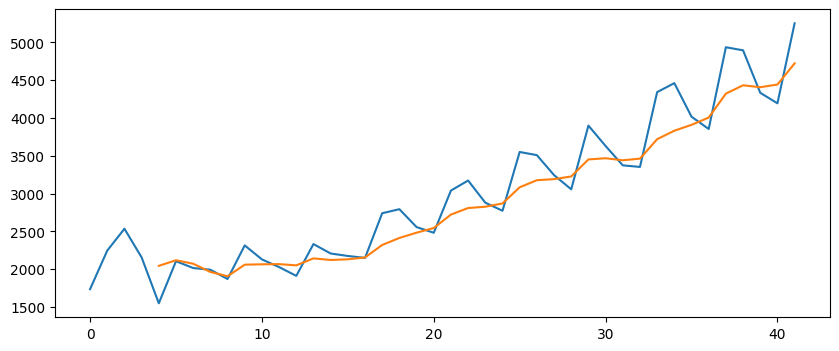

In [25]:
plt.figure(figsize=(10,4))
coke.Sales.plot(label="org")
coke.Sales.rolling(5).mean().plot(label=str(5))
plt.show()

In [26]:
coka=cola.copy()
coka.head()

,Quarter,Sales,quaters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


# **ARIMA Model (Auto Regressive Integrated Moving Average)**

In [27]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00


In [28]:
from statsmodels.tsa.stattools import adfuller # adfuller will help to check if data is stationary or not.
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

ARIMA model is good only on stationary dataset. It can not perform good on non-stationary dataset. For that we have 'd' parameter in ARIMA model which transforms non-stationary data to stationary data. Order is (p,d,q)

In [29]:
# If p<0.05 then Data is Stationary
# If p>0.05 then Data is Non-Stationary

fuller=adfuller(coka["Sales"])
fuller[1]


0.9966611673930905

**We can see that the p value is greater than 0.05, which means data isn't stationary, we have to bring the data to stationary to perform ARIMA**

In [30]:
coka["Salesdiff"]=coka["Sales"].diff(periods=4)
coka.head()

,Quarter,Sales,quaters,Salesdiff
0,Q1_86,1734.827000,Q1,NaN
1,Q2_86,2244.960999,Q2,NaN
2,Q3_86,2533.804993,Q3,NaN
3,Q4_86,2154.962997,Q4,NaN
4,Q1_87,1547.818996,Q1,-187.008003


In [31]:
# Dropping null entries

coka.dropna(inplace=True)
coka.head()

,Quarter,Sales,quaters,Salesdiff
4,Q1_87,1547.818996,Q1,-187.008003
5,Q2_87,2104.411995,Q2,-140.549004
6,Q3_87,2014.362999,Q3,-519.441994
7,Q4_87,1991.746998,Q4,-163.216000
8,Q1_88,1869.049999,Q1,321.231003


In [32]:
Fuller=adfuller(coka["Salesdiff"])
Fuller[1]

0.09092533196680103

**As P-value 0.04 is less than 0.05 we can say data is stationary and we can procced to build a model on ARIMA**

In [33]:
step=auto_arima(coka["Salesdiff"]) #auto_arima() function returns all these values p,d,q
step

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**Function takes combination of p,d,q values, whichever combinations gives minimum AIC value, that combination of p,d,q will be the best.**

In [34]:
# Now we will split the data

Train=coka.head(34)
Test=coka.tail(9)

In [38]:
# Model building

arima=ARIMA(Train["Salesdiff"],order=(0,1,0)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
Pred=arima.predict(start=33,end=41)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
RMSE=np.sqrt(mean_squared_error(Pred,Test['Salesdiff']))
RMSE

187.14759475403957

In [54]:
data={"Model":(["linear","Exponential","Quadratic","Additive Seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Multiplicative Seasonality Quadratic","ARIMA"]),
    "RMSE":([linear_rmse,rmse_exp,rmse_qua,rmse_add,rmse_add_sea,rmse_multi,rmse_sea_qua,RMSE])}

df=pd.DataFrame(data)
df.sort_values(["RMSE"])

,Model,RMSE
7,ARIMA,187.147595
4,Additive Seasonality Quadratic,245.029180
2,Quadratic,429.267867
0,linear,719.386396
3,Additive Seasonality,1823.129719
6,Multiplicative Seasonality Quadratic,4488.764522
1,Exponential,4488.973342
5,Multiplicative Seasonality,4489.412438


# **With the above result we can see the least value of RMSE is obtained by ARIMA, which is best sutied model we could consider**